# Airline On-Time Performance Data
## by Mariam COULIBALY

## Introduction
Cet ensemble de données rapporte les vols aux États-Unis en 2008, y compris les transporteurs, les raisons de l'annulation des vols, les retards à l'arrivée et au départ, et les raisons des retards.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

In [2]:
#lire le fichier CSV
vols2008=pd.read_csv("2008.csv")

In [3]:
vols2008.shape

(2389217, 29)

In [4]:
vols2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300) 

In [6]:
vols2008.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [7]:
vols2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
vols2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,2.388810e+06,2.319121e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,1.293776e+02,1.051016e+02,1.027357e+01,1.143636e+01,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,6.948246e+01,6.766801e+01,3.963429e+01,3.653229e+01,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,8.000000e+01,5.600000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,1.110000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.600000e+02,1.340000e+02,1.500000e+01,1.100000e+01,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,1.435000e+03,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [9]:
vols2008.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

**Definition de quelque fonctions**

In [10]:
def value_counts(columns, df):
    for column in columns:
        print(df[column].value_counts())

In [11]:
def unique(columns, df):
    for column in columns:
        print("colonne: "+ column)
        print(df[column].unique())

In [12]:
def nunique(columns, df):
    for column in columns:
        print("colonne: "+ column)
        print(df[column].nunique())

In [13]:
def isnull_sum(columns, df):
    for column in columns:
        print("colonne: "+ column)
        print(df[column].isnull().sum())

In [14]:
columns=['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest','Cancelled', 'CancellationCode', 'Diverted',
           'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
value_counts(columns,vols2008)

2008    2389217
Name: Year, dtype: int64
3    616090
1    605765
4    598126
2    569236
Name: Month, dtype: int64
21    82225
14    82223
4     82101
25    82045
28    81974
7     81942
18    81902
11    81519
3     81108
24    81087
10    80543
17    80508
6     79879
20    79565
27    79527
13    79091
22    77730
15    77716
29    77447
8     77320
2     77029
16    76898
23    76860
1     76749
9     76023
5     75303
19    74270
26    74226
12    73690
30    59812
31    40905
Name: DayofMonth, dtype: int64
3    365560
2    358942
5    350566
4    349831
1    347984
7    328237
6    288097
Name: DayOfWeek, dtype: int64
ATL    137014
ORD    118008
DFW     93041
DEN     78384
LAX     73480
PHX     69404
IAH     62549
LAS     59653
DTW     56180
EWR     48938
SLC     48412
SFO     45738
MSP     45658
MCO     45460
CLT     41862
LGA     40823
BOS     40104
JFK     39835
BWI     34575
SEA     33906
PHL     33041
CVG     32680
SAN     31621
MDW     30475
DCA     29032
TPA     28033
MEM 

A    26075
B    25744
C    12617
D        6
Name: CancellationCode, dtype: int64
0    2383563
1       5654
Name: Diverted, dtype: int64
0.0       325898
6.0         8775
7.0         8415
1.0         8043
15.0        7941
           ...  
753.0          1
752.0          1
748.0          1
1131.0         1
445.0          1
Name: CarrierDelay, Length: 781, dtype: int64
0.0       546933
10.0        1181
15.0        1093
6.0         1066
7.0          992
8.0          970
9.0          907
5.0          867
4.0          823
20.0         808
12.0         792
11.0         786
2.0          760
3.0          760
14.0         754
16.0         740
13.0         726
17.0         720
1.0          715
18.0         683
25.0         624
19.0         605
21.0         570
30.0         555
22.0         528
23.0         522
24.0         492
28.0         480
26.0         442
27.0         435
35.0         402
40.0         381
32.0         375
29.0         362
31.0         331
33.0         328
34.0         309
45

0.0       234935
15.0       14952
16.0       13462
1.0        12987
2.0        12454
3.0        12086
17.0       12073
4.0        11685
5.0        11413
18.0       10971
6.0        10534
19.0       10066
7.0        10024
8.0         9638
20.0        9288
9.0         9009
21.0        8408
10.0        8349
11.0        7742
22.0        7626
12.0        7065
23.0        6985
13.0        6724
24.0        6396
14.0        6165
25.0        5894
26.0        5337
27.0        4995
28.0        4671
29.0        4337
30.0        3974
31.0        3667
32.0        3416
33.0        3131
34.0        2969
35.0        2725
36.0        2579
37.0        2350
38.0        2253
39.0        2094
40.0        2061
42.0        1810
41.0        1806
43.0        1656
44.0        1603
45.0        1544
46.0        1462
47.0        1371
48.0        1239
50.0        1230
49.0        1191
51.0        1168
53.0        1082
52.0        1058
54.0        1002
55.0         958
56.0         890
57.0         830
59.0         8

In [15]:
unique(columns,vols2008)

colonne: Year
[2008]
colonne: Month
[1 2 3 4]
colonne: DayofMonth
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
colonne: DayOfWeek
[4 5 6 7 1 2 3]
colonne: Origin
['HOU' 'HRL' 'IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF'
 'MCI' 'MCO' 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX'
 'PHL' 'PHX' 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO'
 'SJC' 'SLC' 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS'
 'BDL' 'BHM' 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN'
 'DTW' 'ELP' 'FLL' 'GEG' 'ROC' 'DAY' 'ORD' 'EWR' 'SYR' 'IAH' 'LFT' 'MKE'
 'CHS' 'LCH' 'CLT' 'BTR' 'CRW' 'FAT' 'COS' 'MRY' 'LGB' 'BFL' 'EUG' 'ICT'
 'MEM' 'LGA' 'DCA' 'BTV' 'GRK' 'BRO' 'TYS' 'DSM' 'BPT' 'GPT' 'GRR' 'PWM'
 'MSP' 'RIC' 'CVG' 'SAV' 'SRQ' 'GSO' 'CHA' 'XNA' 'GSP' 'LEX' 'MFE' 'ABE'
 'MLU' 'MOB' 'LRD' 'SHV' 'TLH' 'CAE' 'AEX' 'ATL' 'DFW' 'BGR' 'AVL' 'BOS'
 'MSN' 'HSV' 'MGM' 'MYR' 'VPS' 'CLL' 'PNS' 'MTJ' 'DAB' 'P

[0.000e+00       nan 3.000e+00 2.000e+01 8.000e+00 6.000e+00 2.000e+00
 1.000e+00 9.000e+00 5.000e+00 2.800e+01 4.000e+00 2.200e+01 7.000e+00
 1.000e+01 1.200e+01 4.600e+01 2.300e+01 1.600e+01 1.900e+01 5.400e+01
 6.700e+01 6.300e+01 1.310e+02 1.760e+02 1.400e+01 1.100e+01 1.800e+01
 3.500e+01 4.200e+01 1.300e+01 3.600e+01 1.500e+01 2.030e+02 2.100e+01
 2.900e+01 1.700e+01 2.600e+01 2.700e+01 3.300e+01 4.000e+01 2.500e+01
 3.700e+01 1.370e+02 5.100e+01 9.600e+01 5.000e+01 4.300e+01 3.100e+01
 3.000e+01 3.400e+01 2.400e+01 7.100e+01 1.050e+02 9.100e+01 1.770e+02
 4.900e+01 4.400e+01 3.900e+01 1.390e+02 1.150e+02 5.900e+01 8.000e+01
 1.120e+02 3.200e+01 1.510e+02 1.100e+02 6.500e+01 9.900e+01 6.600e+01
 4.100e+01 6.000e+01 4.700e+01 8.800e+01 5.300e+01 4.800e+01 5.600e+01
 3.800e+01 1.620e+02 1.600e+02 5.500e+01 6.800e+01 6.200e+01 5.800e+01
 7.000e+01 7.200e+01 9.400e+01 4.500e+01 9.200e+01 6.400e+01 7.400e+01
 7.300e+01 2.200e+02 1.180e+02 1.560e+02 7.500e+01 6.900e+01 7.900e+01
 1.160

In [16]:
nunique(columns,vols2008)

colonne: Year
1
colonne: Month
4
colonne: DayofMonth
31
colonne: DayOfWeek
7
colonne: Origin
291
colonne: Dest
293
colonne: Cancelled
2
colonne: CancellationCode
4
colonne: Diverted
2
colonne: CarrierDelay
781
colonne: WeatherDelay
481
colonne: NASDelay
483
colonne: SecurityDelay
109
colonne: LateAircraftDelay
474


In [17]:
isnull_sum(columns,vols2008)

colonne: Year
0
colonne: Month
0
colonne: DayofMonth
0
colonne: DayOfWeek
0
colonne: Origin
0
colonne: Dest
0
colonne: Cancelled
0
colonne: CancellationCode
2324775
colonne: Diverted
0
colonne: CarrierDelay
1804634
colonne: WeatherDelay
1804634
colonne: NASDelay
1804634
colonne: SecurityDelay
1804634
colonne: LateAircraftDelay
1804634


### Assessing Data
**les Dtypes à modifier**
- Cancelled  (int64 --> categorie(0,1))
- CancellationCode(object-->categorie(A,B,C,D))
- Diverted  (int64 --> categorie(0,1))

### Cleaning Data

In [18]:
# Make copies of original pieces of data
vols2008_clean=vols2008.copy()

#### Define:
changer les Dtypes de:**
- Cancelled  (int64 --> categorie(0,1))
- CancellationCode(object-->categorie(A,B,C,D))
- Diverted  (int64 --> categorie(0,1))

#### Code

In [19]:
#convertir Cancelled, CancellationCode, Diverted de type categorie
columns_var_dict = {'Cancelled': [0,1],'CancellationCode': ['A' ,'B' ,'C', 'D'],'Diverted': [0,1]}
for column in columns_var_dict:
    type = pd.api.types.CategoricalDtype(ordered = True,categories=columns_var_dict[column])
    vols2008_clean[column] = vols2008_clean[column].astype(type)

#### Test

In [20]:
vols2008_clean.dtypes

Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime               float64
CRSDepTime              int64
ArrTime               float64
CRSArrTime              int64
UniqueCarrier          object
FlightNum               int64
TailNum                object
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin                 object
Dest                   object
Distance                int64
TaxiIn                float64
TaxiOut               float64
Cancelled            category
CancellationCode     category
Diverted             category
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
dtype: object

### Storing Data

In [21]:
#sauvegarder le dataframe dans le fichier csv
vols2008_clean.to_csv('vols2008_clean.csv', index=False)

### What is the structure of your dataset?

> Cet ensemble de données contient   2.389.217 détails de vols (lignes) avec 29 caractéristiques(colonnes).La plupart des variables sont numériques, mais certaines sont catégorielles.


### What is/are the main feature(s) of interest in your dataset?

> Toutes les variables associées aux transporteurs,à l'annulation et les raisons de l'annulation des vols,aux retards à l'arrivée,au départ et aux raisons des retards. Notamment: ArrDelay, DepDelay, Cancelled, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Toutes les variables dovent être explorer, mais je me baserais principalement sur:Year, Month, DayofMonth, DayOfWeek, ArrDelay, DepDelay, Origin, Dest, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay et  LateAircraftDelay.

## Univariate Exploration

In [22]:
#créons la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize du graphique
def affiche_graphique_labels(titre,xlabel,ylabel, sizetitre):
    plt.title(titre,fontsize=sizetitre);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt

In [23]:
#fonction pour afficher le subplot Bar d'une liste de variables et de dataframe 
def affiche_Subplot_Bar(nbreLigne,nbreColonne,columns,df,figSizeX, figSizeY):
    base_color =sb.color_palette()[0]
    plt.figure(figsize = [figSizeX, figSizeY])
    for i in range(len(columns)):
        plt.subplot(nbreLigne, nbreColonne, i+1)
        freq = df[columns[i]].value_counts()
        # Obtenir les index de la série
        sb.countplot(data=df, x=df[columns[i]], color=base_color);
        

In [24]:
#fonction pour affiche le graphiques des frequences relatives
def plot_freq_rela(df,var_column):
    # Retourner la somme de toutes les valeurs non nulles de la colonne « var_column »
    n=df.shape[0]
    var_column_counts=df[var_column].value_counts()
    # Retourner la fréquence la plus élevée dans la colonne « type »
    max_count=df[var_column].value_counts().max()
    max_prop=max_count/n
    #plot
    base_color = sb.color_palette()[0]
    ticks=np.arange(0,max_prop,0.1)
    ticks_names=['{:0.1f}'.format(v) for v in ticks]
    #Changer les emplacements des ticks et les étiquettes
    plt.yticks(ticks*n,ticks_names)
    sb.countplot(data = df, x = var_column, color = base_color);

    # Obtenir les emplacements et les étiquettes des ticks actuels
    locs, labels = plt.xticks(rotation=0)

    # Boucler sur chaque paire d'emplacements et d'étiquettes
    for loc, label in zip(locs, labels):
        # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
        count = var_column_counts[int(label.get_text())]
        # Convertir count en pourcentage, puis en chaîne de caractères
        pct_string = '{:0.1f}%'.format(100*count/n)
        
        # imprimer l'annotation juste en dessous du haut de la barre
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')

In [25]:
#fonction pour affiche le top 10
def plot_top_10(df,var_column):
    # Retourner la somme de toutes les valeurs non nulles de la colonne « var_column »
    n=df.shape[0]
    top_10=df[var_column].value_counts().nlargest(10)
    base_color = sb.color_palette()[0]
    sb.barplot(top_10.index, top_10.values, color = base_color);
    
    # Obtenir les emplacements et les étiquettes des ticks actuels
    locs, labels = plt.xticks()

    # Boucler sur chaque paire d'emplacements et d'étiquettes
    for loc, label in zip(locs, labels):
        # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
        count = top_10[label.get_text()]
        # Convertir count en pourcentage, puis en chaîne de caractères
        pct_string = '{:0.2f}%'.format(100*count/n)
        # imprimer l'annotation juste en dessous du haut de la barre
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')

**1. Distribution de Month,DayofMonth,DayOfWeek**

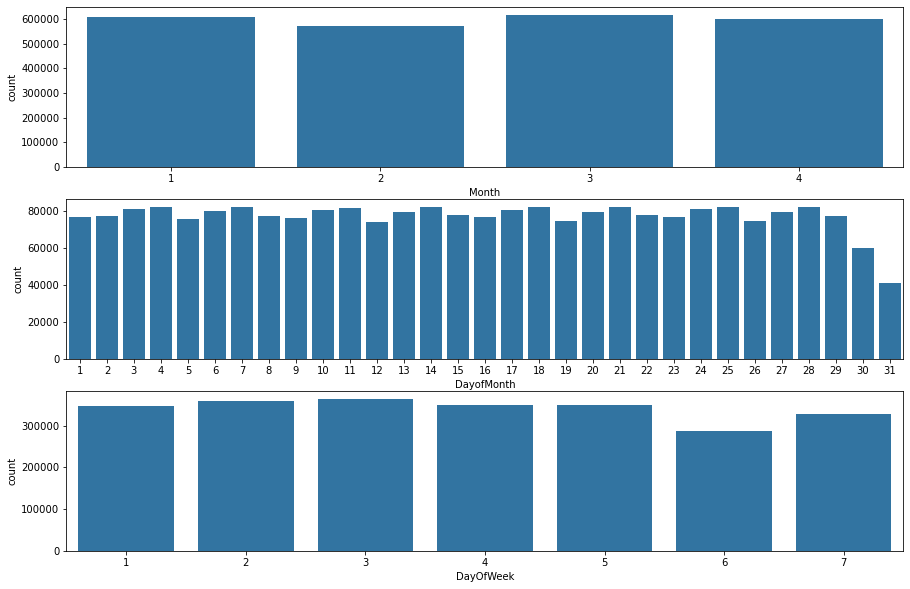

In [26]:
columns=['Month','DayofMonth','DayOfWeek']
affiche_Subplot_Bar(3,1,columns,vols2008_clean,15,10)

- les vols de 2008 ne concernent que quatre mois, en plus le mois qui a enregistré plus de vols est le mois de **Mars**, suivi de **Janvier**, **Avril** et **Février**.
- le **jour du mois** qui a enregistré le **maximum** de vols est le **21** et le nombre **minimum** de vol est le **31**.
- les **jour de la semaine** ou les personnes voyage moins est le **Week-end Samedi** suivi de **Dimanche**, par contre les personnes voyage beaucoup plus le **Mercredi** suivi de **Mardi**.


**2. Distribution de Cancelled, Diverted**

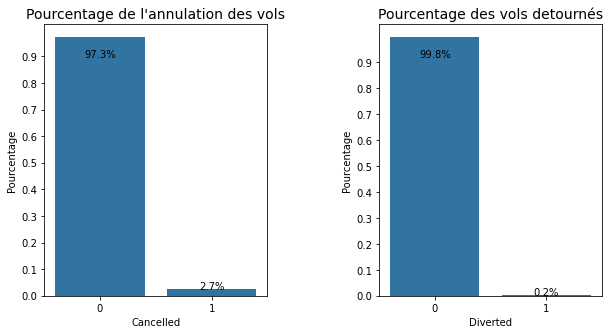

In [27]:
#frequences relatives: annulation et detournement des vols
plt.figure(figsize = [10, 5])
plt.subplots_adjust(hspace=1,wspace=0.5)

plt.subplot(1, 2, 1)
plot_freq_rela(vols2008_clean,'Cancelled')
affiche_graphique_labels("Pourcentage de l'annulation des vols",'Cancelled','Pourcentage',14);

plt.subplot(1, 2, 2)
plot_freq_rela(vols2008_clean,'Diverted')
affiche_graphique_labels("Pourcentage des vols detournés",'Diverted','Pourcentage',14);

on peut voir que **2.7%** des vols ont été annulé et seulement **0.2%** ont été detourné

**3. Distribution du CancellationCode**

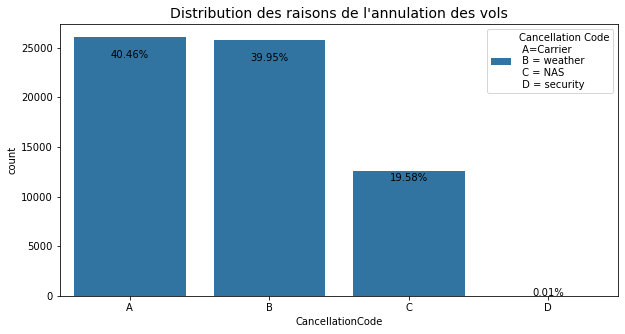

In [28]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10, 5))
sb.countplot(data = vols2008_clean, x = 'CancellationCode', color = base_color);

# ajouter les annotations sur la proportion des vols annulés
var_counts=vols2008_clean['CancellationCode'].value_counts()
n=var_counts.sum()
locs, labels = plt.xticks()

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = var_counts[label.get_text()]
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.2f}%'.format(100*count/n)

    # imprimer l'annotation à la barre
    plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')
    plt.title("Distribution des raisons de l'annulation des vols",fontsize=14)
    plt.legend(['Cancellation Code\n A=Carrier\n B = weather \n C = NAS \n D = security'])
   

- la raison la plus fréquente d'annulation des vols est le **transporteur (A) soit 40.46%**, suivie de la **météo (B) soit 39.95%** et le **Système national d'espace aérien ou National Airspace System en anglais (C) soit 19.58%**.
- Il n'y a presque pas d'annulation des vols pour des raisons de **sécurité (D) soit 0.01%**.


**4. Distribution de Origin, Dest, UniqueCarrier**

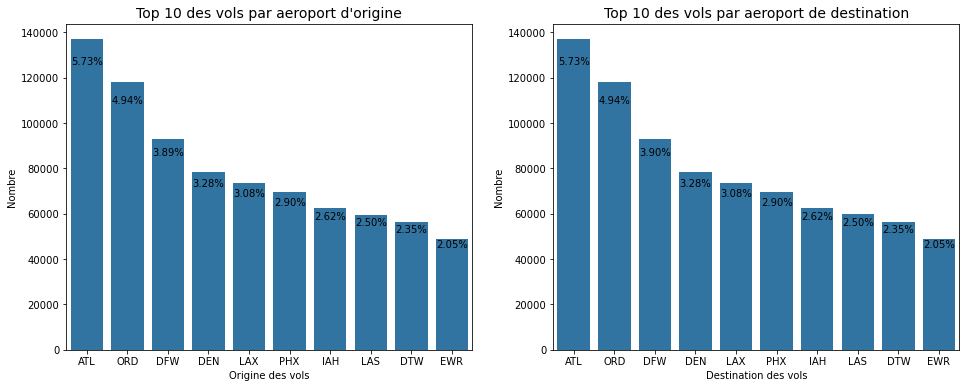

In [29]:
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plot_top_10(vols2008_clean,'Origin')
affiche_graphique_labels("Top 10 des vols par aeroport d'origine",'Origine des vols','Nombre',14);
plt.subplot(1,2,2)
plot_top_10(vols2008_clean,'Dest')
affiche_graphique_labels("Top 10 des vols par aeroport de destination",'Destination des vols','Nombre',14);

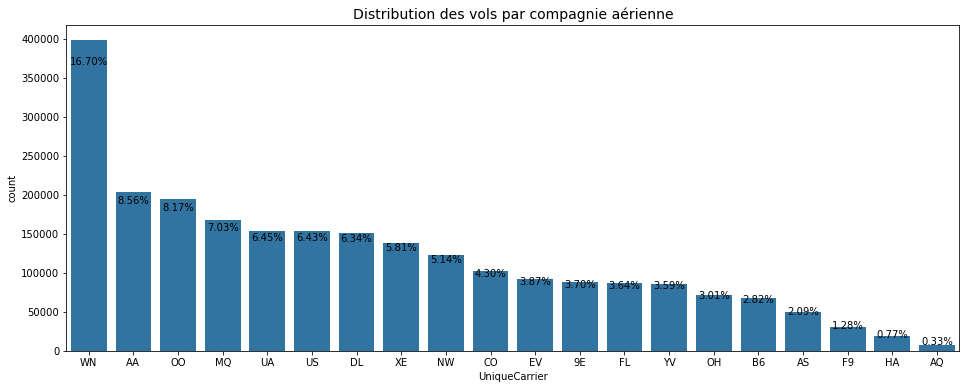

In [30]:
base_color = sb.color_palette()[0]
var_counts=vols2008_clean['UniqueCarrier'].value_counts()
freq=var_counts.index
plt.figure(figsize=(16, 6))
sb.countplot(data = vols2008_clean, x = 'UniqueCarrier', color = base_color, order=freq);

# ajouter les annotations 
n=var_counts.sum()
locs, labels = plt.xticks()

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = var_counts[label.get_text()]
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.2f}%'.format(100*count/n)

    # imprimer l'annotation à la barre
    plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')
    plt.title("Distribution des vols par compagnie aérienne",fontsize=14)

- **ATL** est l'aéroport le plus fréquenté, que ce soit en terme du nombre de depart que de destination avec **5,73%** du total des vols
- La compagnie aérienne **WN** est la compagnie qui a effectué le maximum de vols **(16,7 %)** suivie de **AA (8,56 %)**.Par contre **AQ** est la compagnie qui a effectué moins de vols avec **0,33 %** suivie de **HA (0,77 %)**.

**5. Distribution DepDelay, ArrDelay** 

Un vol est considéré comme retardé  si heure de départ/arrivée réelle est superieur à l'heure de départ/arrivée prévue. En d'autre terne si retard d'arrivée ou de départ est positive(supéieur à 0).

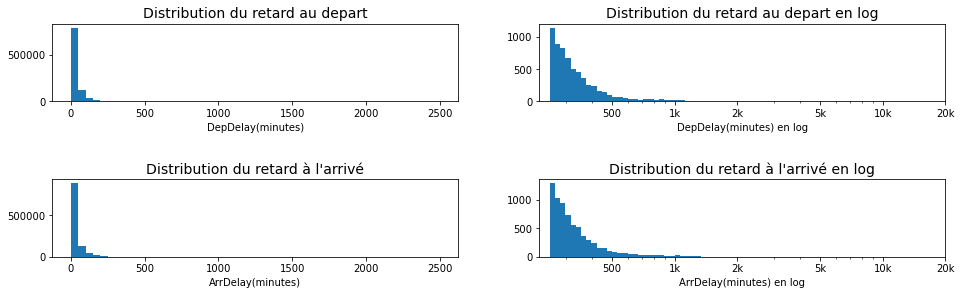

In [31]:
vols2008_DepDelay=vols2008_clean[vols2008_clean['DepDelay']>0]
vols2008_ArrDelay=vols2008_clean[vols2008_clean['ArrDelay']>0]
# les vols en retard au depart
plt.figure(figsize=[16, 10])
plt.subplots_adjust(hspace=1)
plt.subplot(4, 2, 1)
bins=np.arange(0,vols2008_DepDelay['DepDelay'].max()+50,50)
plt.hist(data=vols2008_DepDelay, x='DepDelay', bins=bins)
affiche_graphique_labels("Distribution du retard au depart",'DepDelay(minutes)','',14);
plt.subplot(4, 2, 2)
bins = 10 ** np.arange(2.4, np.log10(vols2008_DepDelay['DepDelay'].max())+0.025, 0.025)
plt.hist(data=vols2008_DepDelay, x='DepDelay', bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);
affiche_graphique_labels("Distribution du retard au depart en log",'DepDelay(minutes) en log','',14);

# les vols en retard à l'arrive
plt.subplot(4, 2, 3)
bins=np.arange(0,vols2008_ArrDelay['ArrDelay'].max()+50,50)
plt.hist(data=vols2008_ArrDelay, x='ArrDelay', bins=bins)
affiche_graphique_labels("Distribution du retard à l'arrivé",'ArrDelay(minutes)','',14);
plt.subplot(4, 2, 4)
bins = 10 ** np.arange(2.4, np.log10(vols2008_ArrDelay['ArrDelay'].max())+0.025, 0.025)
plt.hist(data=vols2008_ArrDelay, x='ArrDelay', bins=bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);
affiche_graphique_labels("Distribution du retard à l'arrivé en log",'ArrDelay(minutes) en log','',14);

on constate que les deux distributions du retard de depart et d'arrivée **(DepDelay, ArrDelay)** sont asymétriques à droite.

**6. distrubution de CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay**

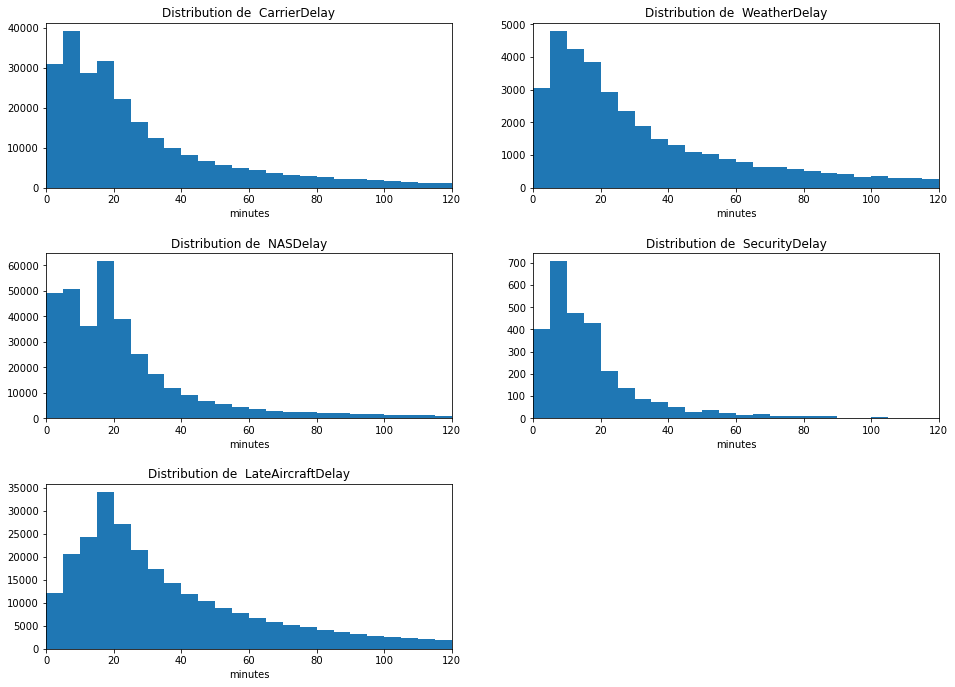

In [32]:
columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
plt.figure(figsize=[16, 20])
plt.subplots_adjust(hspace=0.4)
for i in range(len(columns)):
    binsize=5
    plt.subplot(5, 2, i+1)
    data = vols2008_clean[vols2008_clean[columns[i]]> 0]
    bins = np.arange(0, data[columns[i]].max()+binsize, binsize)
    plt.hist(data[columns[i]], bins = bins,)
    plt.xlabel('minutes');
    plt.xlim(0,120)
    plt.title(f'Distribution de  {columns[i]}'); 

Il ne semble pas y avoir de divergence dans la forme de la distribution des causes du retards pour différentes variables.

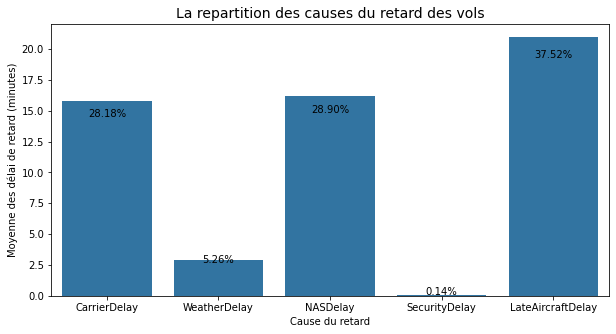

In [33]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10, 5))
columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
means = [vols2008_clean[i].mean() for i in columns]
data = pd.Series(means, index=columns)
sb.barplot(data.index,data.values,color = base_color);
n=data.sum()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks()
# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = data[label.get_text()]
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.2f}%'.format(100*count/n)
    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')
    
affiche_graphique_labels("La repartition des causes du retard des vols",'Cause du retard',
                         'Moyenne des délai de retard (minutes)',14);


- la cause principal du retard des vols est due au **LateAircraftDelay** soit **37.52%**, suivi du **NAS** ( Système national d'espace aérien ou National Airspace System en anglais) avec **28.90%**, suivi des **transporteurs (CarrierDelay) avec 28.18%** et les **conditions météorologique (WeatherDelay) avec 5.26%**
- Il n'y a presque pas du retard des vols cause par la **sécurité(SecurityDelay) avec 0.14%**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Les points suivants ont été notés dans l'exploration univariée:

- les vols de 2008 ne concernent que quatre mois, en plus le mois qui a enregistré plus de vols est le mois de **Mars**, suivi de **Janvier**, **Avril** et **Février**.
- le **jour du mois** qui a enregistré le **maximum** de vols est le **21** et le nombre **minimum** de vol est le **31**.
- les **jour de la semaine** ou les personnes voyage moins est le **Week-end Samedi** suivi de **Dimanche**, par contre les personnes voyage beaucoup plus le **Mercredi** suivi de **Mardi**.

- on peut voir que **2.7%** des vols ont été annulé et seulement **0.2%** ont été detourné

- la raison la plus fréquente d'annulation des vols est le **transporteur (A) soit 40.46%**, suivie de la **météo (B) soit 39.95%** et le **Système national d'espace aérien ou National Airspace System en anglais (C) soit 19.58%**.
- Il n'y a presque pas d'annulation des vols pour des raisons de **sécurité (D) soit 0.01%**.

- **ATL** est l'aéroport le plus fréquenté, que ce soit en terme du nombre de depart que de destination avec **5,73%** du total des vols
- La compagnie aérienne **WN** est la compagnie qui a effectué le maximum de vols **(16,7 %)** suivie de **AA (8,56 %)**.Par contre **AQ** est la compagnie qui a effectué moins de vols avec **0,33 %** suivie de **HA (0,77 %)**.

- on constate que les deux distributions du retard de depart et d'arrivée **(DepDelay, ArrDelay)** sont asymétriques à droite. 

- Il ne semble pas y avoir de divergence dans la forme de la distribution des causes du retards pour différentes variables.
- la cause principal du retard des vols est due au **LateAircraftDelay** soit **37.52%**, suivi du **NAS** ( Système national d'espace aérien ou National Airspace System en anglais) avec **28.90%**, suivi des **transporteurs (CarrierDelay) avec 28.18%** et les **conditions météorologique (WeatherDelay) avec 5.26%**
- Il n'y a presque pas du retard des vols cause par la **sécurité(SecurityDelay) avec 0.14%**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

les explorations des variables montrent des resultats normales.Les operations suivantes ont été effectuer:

- convertir **Cancelled, CancellationCode et Diverted**  en variable de **type categorielle**.
- Un vol est considéré comme retardé  si heure de départ/arrivée réelle est superieur à l'heure de départ/arrivée prévue. En d'autre terne si retard d'arrivée ou de départ est positive(supéieur à 0).J'ai creée deux(2) ensembles des données pour les retard au depart et à l'arrivé des vols.
- J'ai aussi creé un dataset sur la moyenne les causes de retard des vols.

## Bivariate Exploration

**1. Relation entre ArrDelay et DepDelay**

Un vol est considéré comme retardé  si heure de départ/arrivée réelle est superieur à l'heure de départ/arrivée prévue. En d'autre terne si retard d'arrivée ou de départ est positive(supéieur à 0).

In [34]:
vols2008_Delay=vols2008_clean[(vols2008_clean['DepDelay']>0) & (vols2008_clean['ArrDelay']>0)]

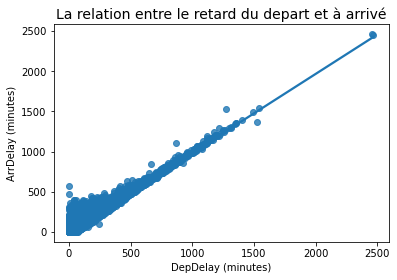

In [35]:
sb.regplot(data=vols2008_Delay,x='DepDelay', y='ArrDelay')
affiche_graphique_labels("La relation entre le retard du depart et à arrivé",'DepDelay (minutes)',
                         'ArrDelay (minutes)',14);

Dans le nuage de points ci-dessus,on constate que une grande quantité des points se chevauchent, ceci rend difficile de voir la relation réelle entre les variables tracées. Dans des cas comme celui-ci, nous pouvons vouloir utiliser la transparence et la gigue pour rendre le nuage de points plus informatif ou utilise un diagramme heatmaps qui est une version 2D de l'histogramme.

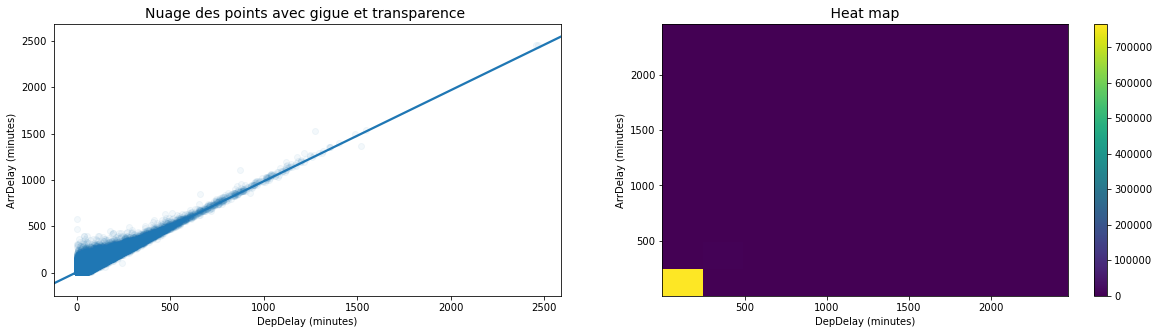

In [36]:
plt.figure(figsize = [20, 5])

#Graphique de gauche- nuage avec gigue et transparence
plt.subplot(1, 2, 1)
sb.regplot(data=vols2008_Delay,x='DepDelay', y='ArrDelay', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
affiche_graphique_labels("Nuage des points avec gigue et transparence ",'DepDelay (minutes)','ArrDelay (minutes)',14);
# Graphique de droite- heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=vols2008_Delay, x='DepDelay', y='ArrDelay')
plt.colorbar() 
affiche_graphique_labels(" Heat map ",'DepDelay (minutes)','ArrDelay (minutes)',14);

In [37]:
vols2008_Delay['ArrDelay'].corr(vols2008_Delay['DepDelay'])

0.9532342666394756

Il existe une forte correlation positive entre le retard du depart et à l'arrivée, ceci semble logique car un retard de depart va forcement entraine un retard à l'arrivé.

**2.Relation entre DepDelay, ArrDelay, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay**
       

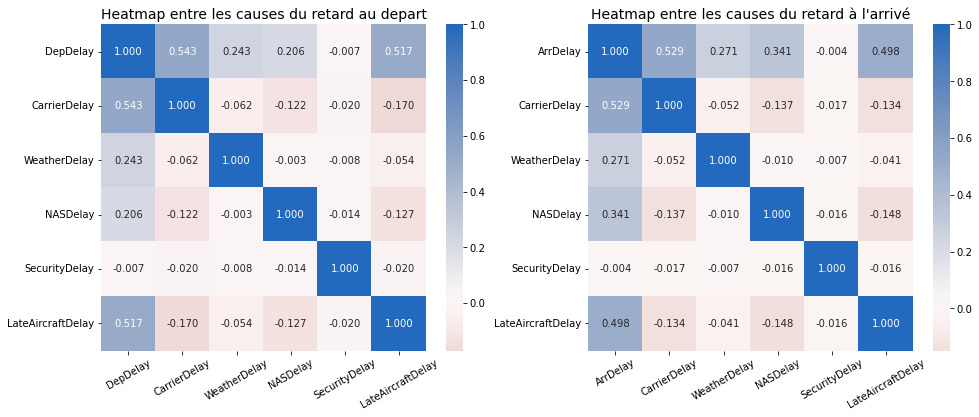

In [38]:
DepDelay_vars=['DepDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
ArrDelay_vars=['ArrDelay','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
plt.figure(figsize = [16, 6])
plt.subplot(1, 2, 1)
sb.heatmap(vols2008_DepDelay[DepDelay_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title('Heatmap entre les causes du retard au depart',fontsize=14);
plt.xticks(rotation=30);
plt.subplot(1, 2, 2)
sb.heatmap(vols2008_ArrDelay[ArrDelay_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title("Heatmap entre les causes du retard à l'arrivé",fontsize=14);
plt.xticks(rotation=30);


- Les retards de depart et d'arrivé des vols ont une valeur un peu superieur à 0.5 de coefficient de correlation avec **CarrierDelay et Late Aircraft**, ceux qui signifie qu'ils existent une forte correlation positive entre les variables **DepDelay, ArrDelay, CarrierDelay et LateAircraftDelay**. En d'autre terme les vols à plus de chance d'être en retard au depart ou à l'arrivé.
- Il ya une faible correlation negative entre les causes du retard qui sont **CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay**

**3. Relation entre Cancelled et Month, DayOfWeek**

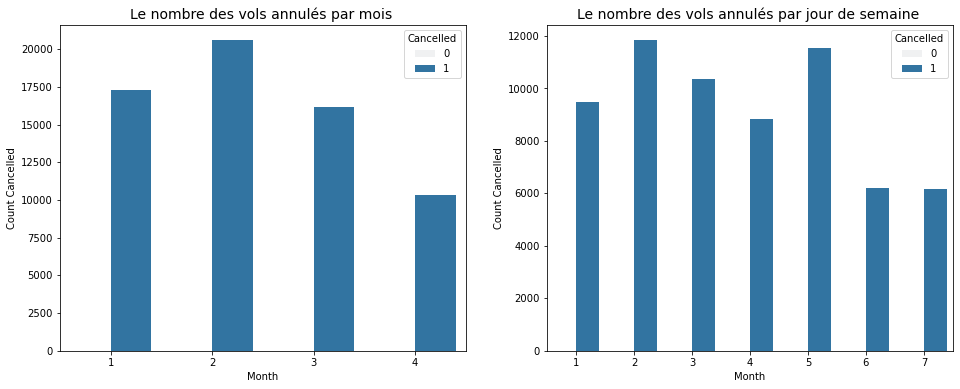

In [39]:
vols2008_cancelled=vols2008_clean[vols2008_clean['Cancelled']==1]
base_color = sb.color_palette()[0] 

plt.figure(figsize = [16, 6])
plt.subplot(1, 2, 1)
sb.countplot(data=vols2008_cancelled, x='Month', hue='Cancelled', color=base_color)
affiche_graphique_labels("Le nombre des vols annulés par mois ",'Month','Count Cancelled',14);

plt.subplot(1, 2, 2)
sb.countplot(data=vols2008_cancelled, x='DayOfWeek', hue='Cancelled', color=base_color)
affiche_graphique_labels("Le nombre des vols annulés par jour de semaine ",'Month','Count Cancelled',14);

- On peut voir que le mois de **Fevrier** est le mois ou on a eu plus d'annulation des vols avec plus de **20.000** de vols annulés, suivi du mois de **Janvier** avec plus de **17.000** vols annulés, suivi du mois de **Mars** avec de plus de **16.000* vols annulés et mois **d'Avril** avec plus de **10.000** annulation de vols.
- Le **Mardi** est le jours de la semaine ou on a eu plus d'annulation de vols avec **11841** suivi de **vendredi** avec **11.553**, suivi de **Mercredi** avec **10.372**, suivi de **Lundi** avec **9.487**, suivi de **Jeudi** avec **8.832**, suivi de **Samedi** avec **6.187** et **Dimanche** avec **6.170**

**4. Relation entre DepDelay,ArrDelay Month, DayOfWeek**

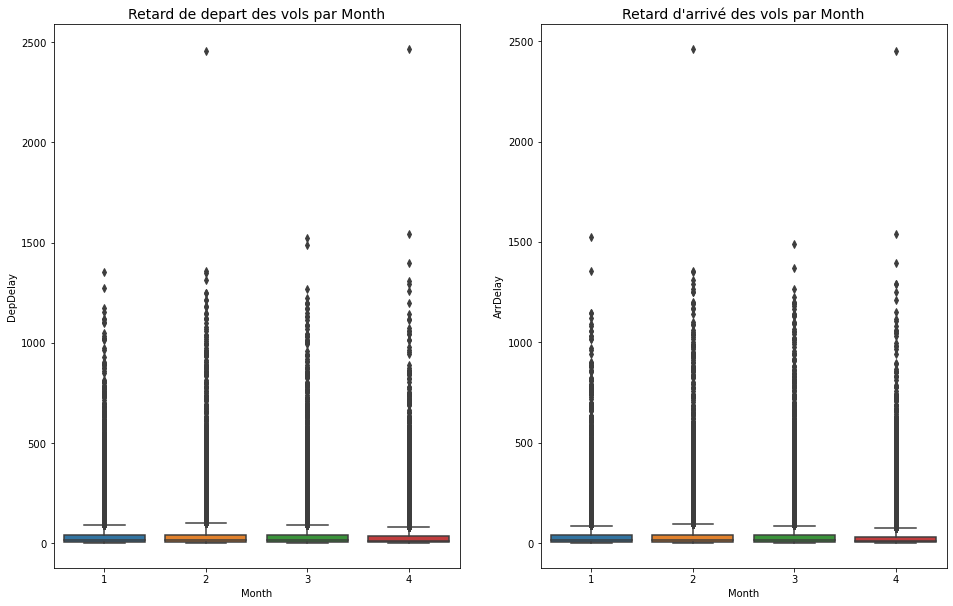

In [40]:
# graphique DepDelay,ArrDelay Month

plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)
plt.subplot(1, 2, 1)
sb.boxplot(data=vols2008_DepDelay, x='Month', y='DepDelay');
affiche_graphique_labels("Retard de depart des vols par Month",'Month','DepDelay',14);
plt.subplot(1, 2, 2)
sb.boxplot(data=vols2008_ArrDelay, x='Month', y='ArrDelay');
affiche_graphique_labels("Retard d'arrivé des vols par Month",'Month','ArrDelay',14);

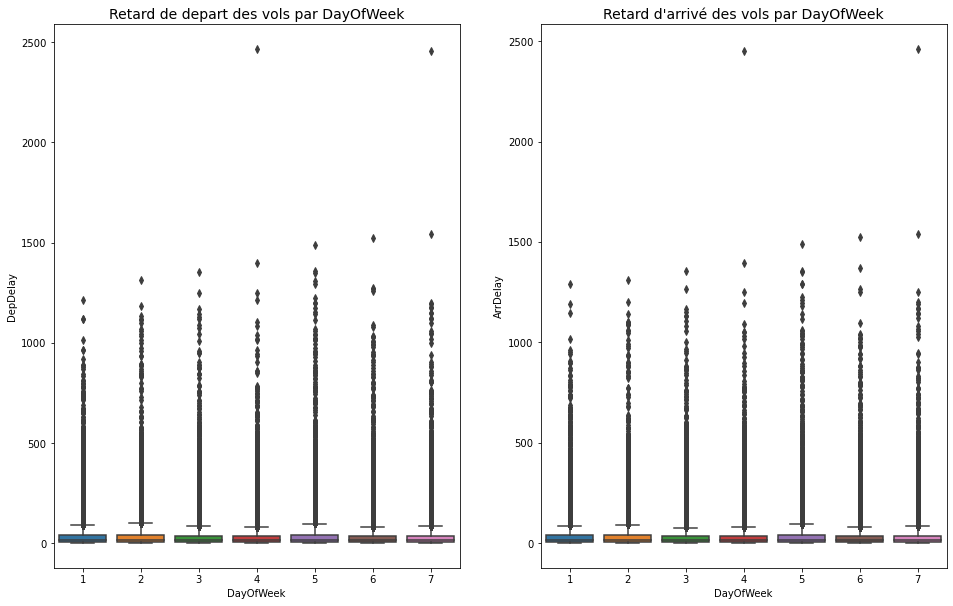

In [41]:
# graphique DepDelay,ArrDelay DayOfWeek

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
sb.boxplot(data=vols2008_DepDelay, x='DayOfWeek', y='DepDelay');
affiche_graphique_labels("Retard de depart des vols par DayOfWeek",'DayOfWeek','DepDelay',14);
plt.subplot(1, 2, 2)
sb.boxplot(data=vols2008_ArrDelay, x='DayOfWeek', y='ArrDelay');
affiche_graphique_labels("Retard d'arrivé des vols par DayOfWeek",'DayOfWeek','ArrDelay',14);

Le **Février et le Vendredi** sont respectivement le mois et le jour de la semaine, qui ont le **maximum de médian** aussi bien qu'au départ qu'à l'arrivé. Tous ces variables ont des **outliers**.

**5. Relation entre CancellationCode, Month, DayOfWeek**

<Figure size 864x720 with 0 Axes>

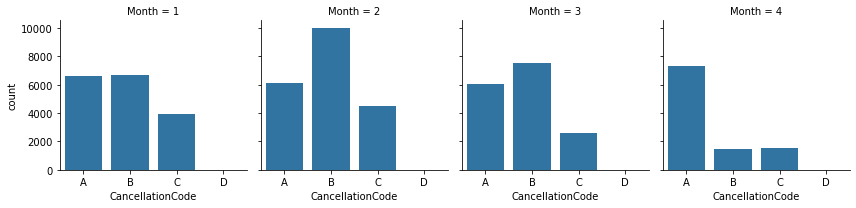

In [42]:
warnings.simplefilter(action="ignore", category=UserWarning)
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = vols2008_cancelled, col = 'Month', col_wrap=4);
g.map(sb.countplot, 'CancellationCode');

<Figure size 864x720 with 0 Axes>

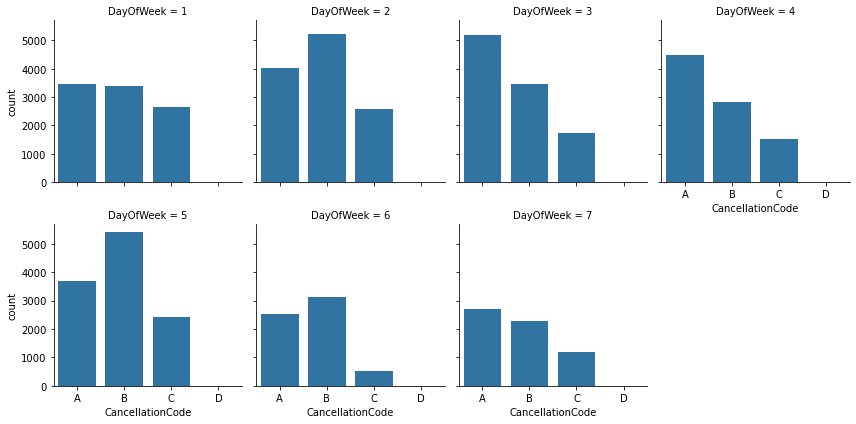

In [43]:
warnings.simplefilter(action="ignore", category=UserWarning)
plt.figure(figsize = [12,10])
g=sb.FacetGrid(data = vols2008_cancelled, col = 'DayOfWeek', col_wrap=4);
g.map(sb.countplot, 'CancellationCode');

- La météo(**Weather=B**) est la cause principale des annulations des vols que ce soit en mois de **Janvier, Fevrier et Mars**, par contre les transporteurs (**Carrier=A**) est la cause principale des annulation des vols en mois **d'avril**.
- Les transporteurs (**Carrier=A**) est la cause principale des annulations des vols que ce soit en **Lundi, Mercredi,Jeudi et Dimanche**, par contre la météo(**Weather=B**) est la cause principale des annulation des vols de **Mardi ,Vendredi et Samedi**.

**6. Relation entre UniqueCarrier,Origin, Dest et Cancelled**

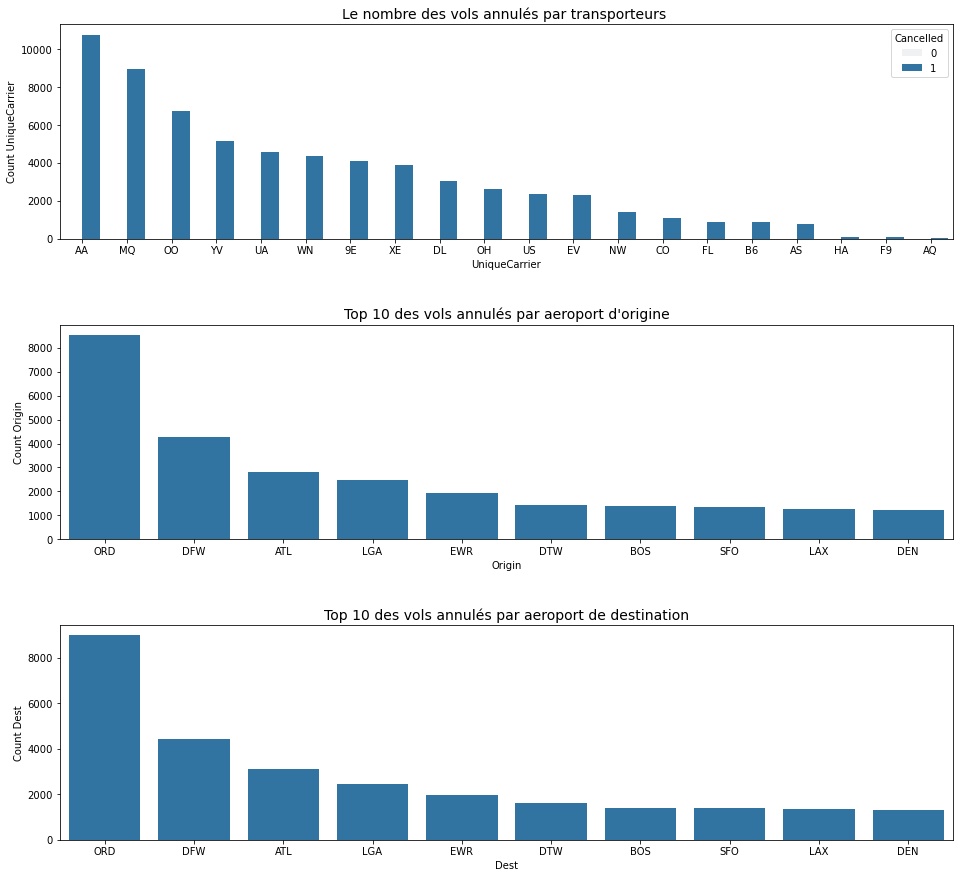

In [44]:
ordreUniqueCarrier=vols2008_cancelled.groupby(['UniqueCarrier']).Cancelled.count().sort_values(ascending=False).index
top10_cancelled_Origin=vols2008_cancelled['Origin'].value_counts().nlargest(10)
top10_cancelled_Dest=vols2008_cancelled['Dest'].value_counts().nlargest(10)
base_color = sb.color_palette()[0] 

plt.figure(figsize = [16, 15])
plt.subplots_adjust(hspace=0.4)
plt.subplot(3, 1, 1)
sb.countplot(data=vols2008_cancelled, x='UniqueCarrier', hue='Cancelled', color=base_color, order=ordreUniqueCarrier)
affiche_graphique_labels("Le nombre des vols annulés par transporteurs ",'UniqueCarrier','Count UniqueCarrier',14);

plt.subplot(3, 1, 2)
sb.barplot(top10_cancelled_Origin.index, top10_cancelled_Origin.values, color = base_color)
affiche_graphique_labels("Top 10 des vols annulés par aeroport d'origine",'Origin','Count Origin',14);

plt.subplot(3, 1, 3)
sb.barplot(top10_cancelled_Dest.index, top10_cancelled_Dest.values, color = base_color)
affiche_graphique_labels("Top 10 des vols annulés par aeroport de destination",'Dest','Count Dest',14);

- **AA** est le transporteur qui à fait le **maximum** d'annulation des vols, suivi **MQ, OO, YV et UA. AQ** est le transporteur qui à fait le minimum d'annulation des vols, suivi de  **F9, HA, AS et B6**.
- **ORD** est l'aéroport qui à fait le **maximum** d'annulation des vols , que ce soit en terme du nombre de depart que d'arrivé.

**7. relation entre UniqueCarrier, DepDelay, ArrDelay**

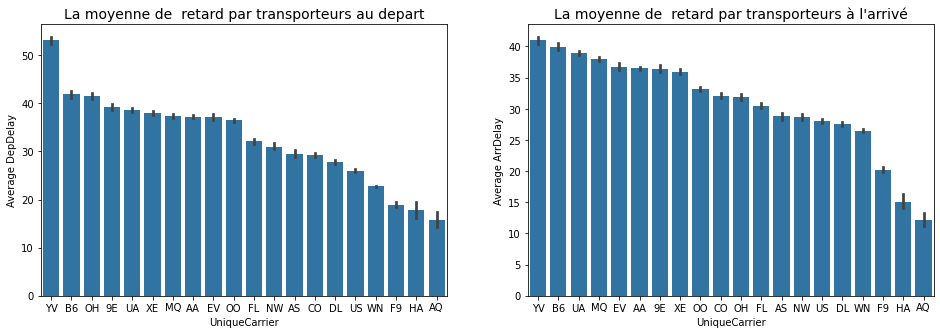

In [45]:
ordreUniqueCarrierDepDelay=vols2008_DepDelay.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False).index
ordreUniqueCarrierArrDelay=vols2008_ArrDelay.groupby(['UniqueCarrier']).ArrDelay.mean().sort_values(ascending=False).index

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.4)
plt.subplot(1, 2, 1)
sb.barplot(data=vols2008_DepDelay, x='UniqueCarrier', y='DepDelay', color=base_color, order=ordreUniqueCarrierDepDelay)
affiche_graphique_labels("La moyenne de  retard par transporteurs au depart",'UniqueCarrier','Average DepDelay',14);

plt.subplot(1, 2, 2)
sb.barplot(data=vols2008_ArrDelay, x='UniqueCarrier', y='ArrDelay', color=base_color, order=ordreUniqueCarrierArrDelay)
affiche_graphique_labels("La moyenne de  retard par transporteurs à l'arrivé",'UniqueCarrier','Average ArrDelay',14);


- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols au depart suivi de  **B6, OH, 9E, UA. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard au depart des vols suivi de **HA, F9, WN, US**.
- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols à l'arrivé suivi de **B6, UA, MQ,EV. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard des vols à l'arrivé suivi de **HA, F9, WN, DL**.

**8. relation entre  Origin & DepDelay , Dest & ArrDelay**

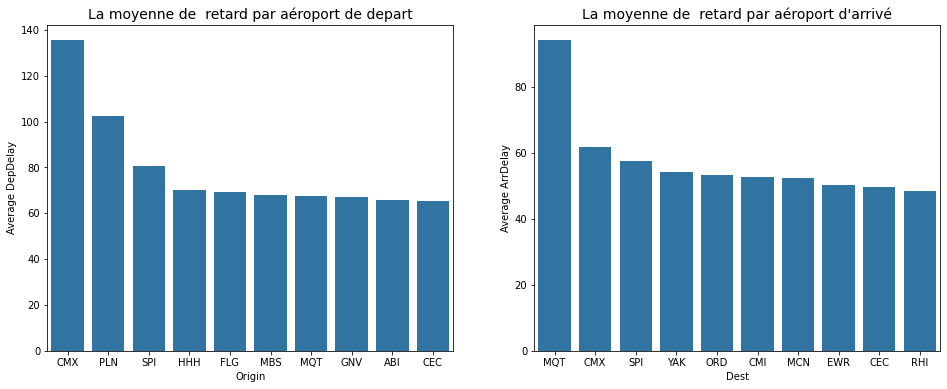

In [46]:
top10_OriginDepDelay=vols2008_DepDelay.groupby(by=['Origin']).DepDelay.mean().sort_values(ascending=False).nlargest(10)
top10_DestArrDelay=vols2008_ArrDelay.groupby(by=['Dest']).ArrDelay.mean().sort_values(ascending=False).nlargest(10)

plt.figure(figsize = [16, 6])
plt.subplots_adjust(hspace=0.4)

plt.subplot(1, 2, 1)
sb.barplot(top10_OriginDepDelay.index, top10_OriginDepDelay.values, color=base_color);
affiche_graphique_labels("La moyenne de  retard par aéroport de depart",'Origin','Average DepDelay',14);

plt.subplot(1, 2, 2)
sb.barplot(top10_DestArrDelay.index, top10_DestArrDelay.values, color=base_color);
affiche_graphique_labels("La moyenne de  retard par aéroport d'arrivé",'Dest','Average ArrDelay',14);

- **CMX** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols au depart ,suivi de **PLN, SPI, HHH, FLG, MBS, MQT, GNV, ABI et CEC.** 
- **MQT** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols à l'arrivé ,suivi de **CMX, SPI, YAK, ORD', CMI, MCN, EWR, CEC et RHI.**

**9. Relation entre Origin et CancellationCode**

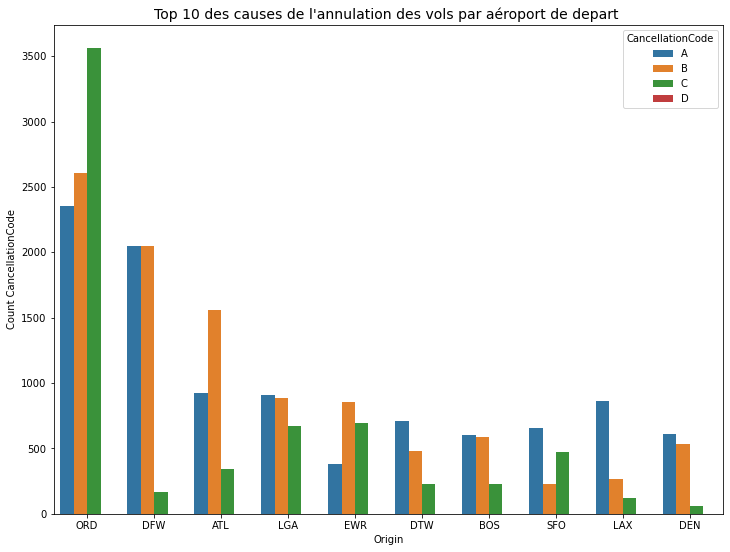

In [47]:
cancellationCode_Origin=vols2008_cancelled['Origin'].value_counts().nlargest(10).index.tolist()
top10_cancellationCode_Origin=vols2008_cancelled[vols2008_cancelled.Origin.isin(cancellationCode_Origin)]

plt.figure(figsize=[12,9])
sb.countplot(data=top10_cancellationCode_Origin,x='Origin',hue='CancellationCode', order=cancellationCode_Origin);
affiche_graphique_labels("Top 10 des causes de l'annulation des vols par aéroport de depart ",'Origin',
                         'Count CancellationCode',14);

Parmi les top 10 des aéroport les plus frequentés au depart, la cause principale des annulations des vols est due aux transporteurs **(Carrier=A)**, mais en **DFW, ATL et EWR** la méteo est une cause importance (weather=B) et en ORD le **Système national d'espace aérien ou National Airspace System en anglais (NAS=C)** est la principale cause.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


- Il existe une forte correlation positive entre le retard du depart et à l'arrivée, ceci semble logique car un retard de depart va forcement entraine un retard à l'arrivé.

- Les retards de depart et d'arrivé des vols ont une valeur un peu superieur à 0.5 de coefficient de correlation avec **CarrierDelay et Late Aircraft**, ceux qui signifie qu'ils existent une forte correlation positive entre les variables **DepDelay, ArrDelay, CarrierDelay et LateAircraftDelay**. En d'autre terme les vols à plus de chance d'être en retard au depart ou à l'arrivé.
- Il ya une faible correlation negative entre les causes du retard qui sont **CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay**

- On peut voir que le mois de **Fevrier** est le mois ou on a eu plus d'annulation des vols avec plus de **20.000** de vols annulés, suivi du mois de **Janvier** avec plus de **17.000** vols annulés, suivi du mois de **Mars** avec de plus de **16.000* vols annulés et mois **d'Avril** avec plus de **10.000** annulation de vols.
- Le **Mardi** est le jours de la semaine ou on a eu plus d'annulation de vols avec **11841** suivi de **vendredi** avec **11.553**, suivi de **Mercredi** avec **10.372**, suivi de **Lundi** avec **9.487**, suivi de **Jeudi** avec **8.832**, suivi de **Samedi** avec **6.187** et **Dimanche** avec **6.170**

- Le **Février et le Vendredi** sont respectivement le mois et le jour de la semaine, qui ont le **maximum de médian** aussi bien qu'au départ qu'à l'arrivé. Tous ces variables ont des **outliers**.

- La météo(**Weather=B**) est la cause principale des annulations des vols que ce soit en mois de **Janvier, Fevrier et Mars**, par contre les transporteurs (**Carrier=A**) est la cause principale des annulation des vols en mois **d'avril**.
- Les transporteurs (**Carrier=A**) est la cause principale des annulations des vols que ce soit en **Lundi, Mercredi,Jeudi et Dimanche**, par contre la météo(**Weather=B**) est la cause principale des annulation des vols de **Mardi ,Vendredi et Samedi**.

- **AA** est le transporteur qui à fait le **maximum** d'annulation des vols, suivi **MQ, OO, YV et UA. AQ** est le transporteur qui à fait le minimum d'annulation des vols, suivi de  **F9, HA, AS et B6**.
- **ORD** est l'aéroport qui à fait le **maximum** d'annulation des vols , que ce soit en terme du nombre de depart que d'arrivé.

- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols au depart suivi de  **B6, OH, 9E, UA. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard au depart des vols suivi de **HA, F9, WN, US**.
- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols à l'arrivé suivi de **B6, UA, MQ,EV. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard des vols à l'arrivé suivi de **HA, F9, WN, DL**.

- **CMX** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols au depart ,suivi de **PLN, SPI, HHH, FLG, MBS, MQT, GNV, ABI et CEC.** 
- **MQT** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols à l'arrivé ,suivi de **CMX, SPI, YAK, ORD', CMI, MCN, EWR, CEC et RHI.**


- Parmi les top 10 des aéroport les plus frequentés au depart, la cause principale des annulations des vols est due aux transporteurs **(Carrier=A)**, mais en **DFW, ATL et EWR** la méteo est une cause importance (weather=B) et en ORD le **Système national d'espace aérien ou National Airspace System en anglais (NAS=C)** est la principale cause.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Les relations intéressantes des autres caractéristiques sont:

- Il existe une forte correlation positive entre le retard du depart et à l'arrivée, ceci semble logique car un retard de depart va forcement entraine un retard à l'arrivé
- Il existe une forte correlation positive entre les variables **DepDelay, ArrDelay, CarrierDelay et LateAircraftDelay**. 
- Il ya une faible correlation negative entre les causes du retard qui sont **CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay**

## Multivariate Exploration

**1.L'evolution du retard de depart dans le temps**

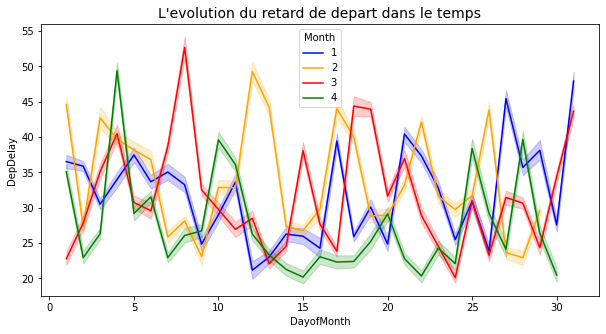

In [48]:
plt.figure(figsize=[10,5])
sb.lineplot(x='DayofMonth',y='DepDelay', hue='Month',data=vols2008_DepDelay, palette=['b','orange','r', 'g']);
plt.title("L'evolution du retard de depart dans le temps",fontsize=14);


Ici, nous pouvons clairement voir les tendances de retards au fil du temps. On voit bien le temps ou on a fait plus de retard est entre le **5 au 10 Mars et entre 11 au 14 Février*.Entre le 14 au 18 Avril** on a fait moins de retard.

**2. Relation entre Month, DayOfWeek, DepDelay**

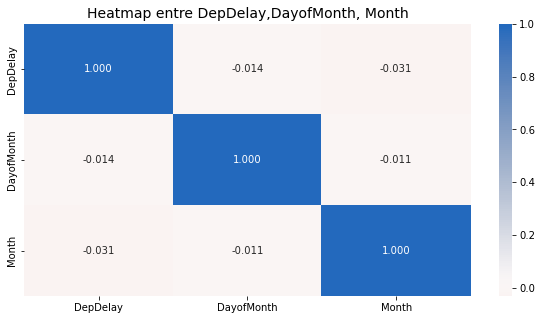

In [49]:
DepDelay_vars3=['DepDelay','DayofMonth','Month']

plt.figure(figsize = [10, 5])
sb.heatmap(vols2008_DepDelay[DepDelay_vars3].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title('Heatmap entre DepDelay,DayofMonth, Month',fontsize=14);

- Il existe une faible correlation negative entre les variables   **Month, DayOfWeek, DepDelay**.

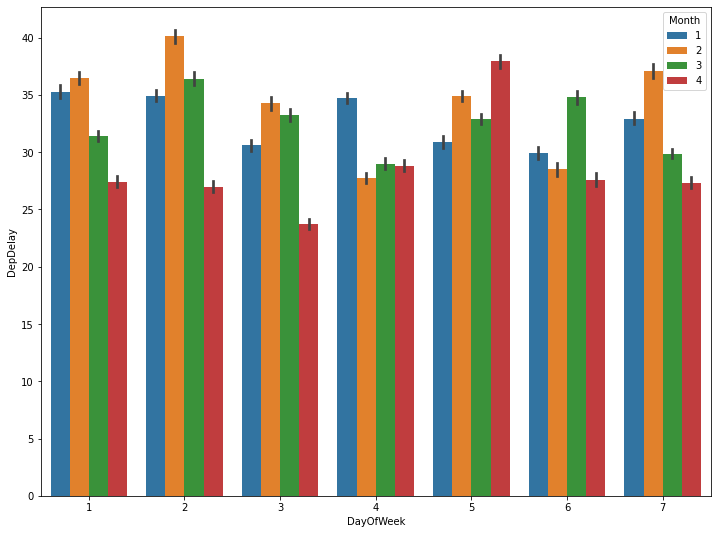

In [50]:
plt.figure(figsize=[12,9])
sb.barplot(x='DayOfWeek',y='DepDelay', hue='Month',data=vols2008_DepDelay);

Le **Mardi du Février** est le jour ou on a fait le maximum de retard, suivi du **Vendredi du Avril**, suivi du **Dimanche Février**, suivi du **Lundi Février**, suivi du **Jeudi Janvier**  suivi du **Samedi Mars** et **Mercredi Février**. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Il existe une faible correlation negative entre les variables   **Month, DayOfWeek, DepDelay**.
- Ici, nous pouvons clairement voir les tendances de retards au fil du temps. On voit bien le temps ou on a fait plus de retard est entre le **5 au 10 Mars et entre 11 au 14 Février*.Entre le 14 au 18 Avril** on a fait moins de retard.
- Le **Mardi du Février** est le jour ou on a fait le maximum de retard, suivi du **Vendredi du Avril**, suivi du **Dimanche Février**, suivi du **Lundi Février**, suivi du **Jeudi Janvier**  suivi du **Samedi Mars** et **Mercredi Février**.   

### Were there any interesting or surprising interactions between features?

je m'attendais à une relation entre la date et le retard, mais cela n'existe pas.

## Conclusions

- les vols de 2008 ne concernent que quatre mois, en plus le mois qui a enregistré plus de vols est le mois de **Mars**, suivi de **Janvier**, **Avril** et **Février**. Les **jour de la semaine** ou les personnes voyage moins est le **Week-end Samedi** suivi de **Dimanche**, par contre les personnes voyage beaucoup plus le **Mercredi** suivi de **Mardi**.

- **2.7%** des vols ont été annulé et seulement **0.2%** ont été detourné.

- la raison la plus fréquente d'annulation des vols est le **transporteur (A) soit 40.46%**, suivie de la **météo (B) soit 39.95%** et le **Système national d'espace aérien ou National Airspace System en anglais (C) soit 19.58%**.
- Il n'y a presque pas d'annulation des vols pour des raisons de **sécurité (D) soit 0.01%**.

- la cause principal du retard des vols est due au **LateAircraftDelay** soit **37.52%**, suivi du **NAS** ( Système national d'espace aérien ou National Airspace System en anglais) avec **28.90%**, suivi des **transporteurs (CarrierDelay) avec 28.18%** et les **conditions météorologique (WeatherDelay) avec 5.26%**. Il n'y a presque pas du retard des vols cause par la **sécurité(SecurityDelay) avec 0.14%**

- Il existe une forte correlation positive entre le retard du depart et à l'arrivée, ceci semble logique car un retard de depart va forcement entraine un retard à l'arrivé.

- **AA** est le transporteur qui à fait le **maximum** d'annulation des vols, suivi **MQ, OO, YV et UA. AQ** est le transporteur qui à fait le minimum d'annulation des vols, suivi de  **F9, HA, AS et B6**.
- **ORD** est l'aéroport qui à fait le **maximum** d'annulation des vols , que ce soit en terme du nombre de depart que d'arrivé.

- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols au depart suivi de  **B6, OH, 9E, UA. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard au depart des vols suivi de **HA, F9, WN, US**.
- **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols à l'arrivé suivi de **B6, UA, MQ,EV. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard des vols à l'arrivé suivi de **HA, F9, WN, DL**.

- **CMX** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols au depart ,suivi de **PLN, SPI, HHH, FLG, MBS, MQT, GNV, ABI et CEC.** 
- **MQT** est L'aéroport qui à fait le **maximum de la moyenne du retard** des vols à l'arrivé ,suivi de **CMX, SPI, YAK, ORD', CMI, MCN, EWR, CEC et RHI.**
- Parmi les top 10 des aéroport les plus frequentés au depart, la cause principale des annulations des vols est due aux transporteurs **(Carrier=A)**, mais en **DFW, ATL et EWR** la méteo est une cause importance (weather=B) et en ORD le **Système national d'espace aérien ou National Airspace System en anglais (NAS=C)** est la principale cause.
- Il existe une faible correlation negative entre les variables   **Month, DayOfWeek, DepDelay**.
- Les tendances de retards au fil du temps, nous montre le temps ou on a fait plus de retard est entre le **5 au 10 Mars et entre 11 au 14 Février*.Entre le 14 au 18 Avril** on a fait moins de retard.
- Le **Mardi du Février** est le jour ou on a fait le maximum de retard, suivi du **Vendredi du Avril**, suivi du **Dimanche Février**, suivi du **Lundi Février**, suivi du **Jeudi Janvier**  suivi du **Samedi Mars** et **Mercredi Février**.
